In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.integrate import quad
from scipy.interpolate import interp1d

from blade_design import blade_design, airfoil_path, process_file
from bemt import coefficients_extrapolation, bemt

### Blade Design with diferent number of blades

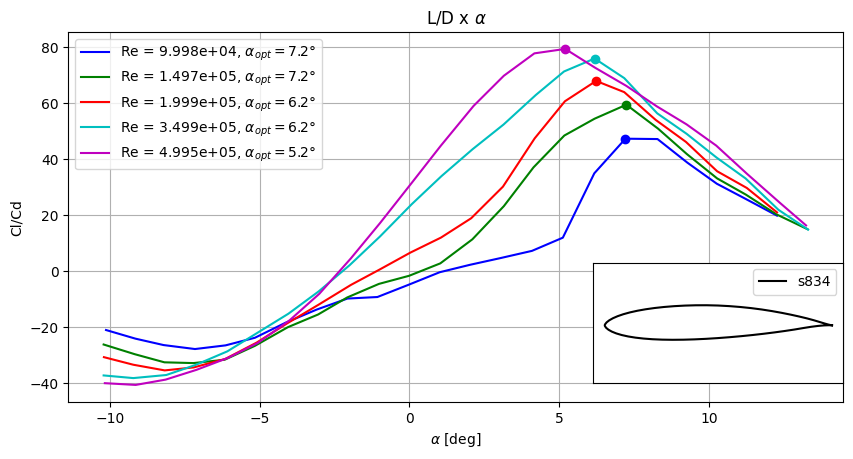

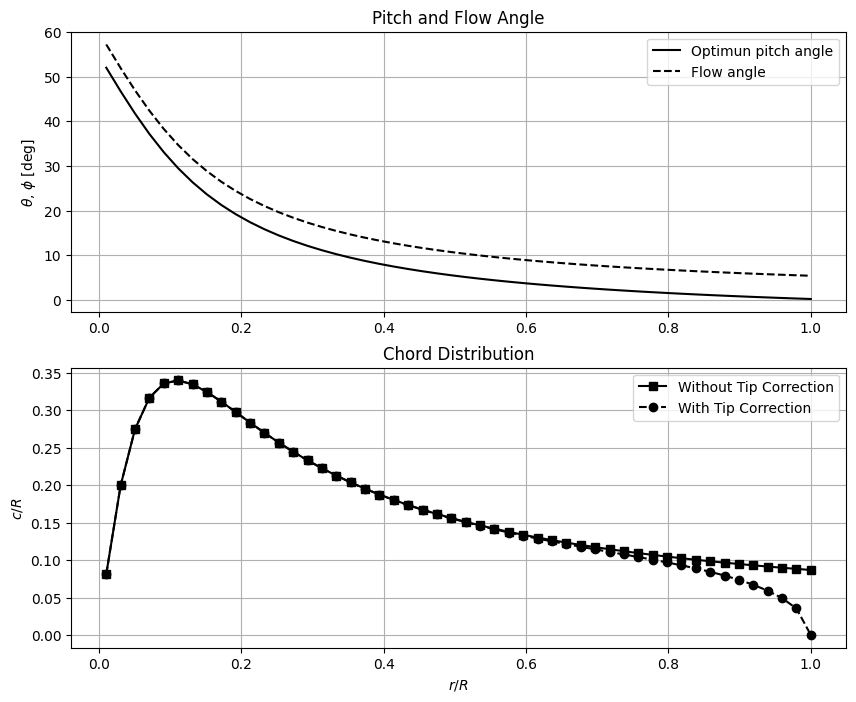

In [2]:
rotor_uniform = blade_design('s834', 7, 2, number_of_sections=50,plot=True)


### Validate Cp curve for Optimum Blade design

[0.28812831 0.32096026 0.34896809 0.37299834 0.3937275  0.41170289
 0.42737008 0.4410933  0.45317142 0.46385064 0.4733346  0.48179242
 0.48936523 0.4961713  0.5023102  0.50786611 0.51291058 0.51750459
 0.52170043 0.52554304 0.52907126 0.53231874 0.53531477 0.53808491
 0.54065157 0.54303444 0.54525088 0.54731624 0.54924415 0.55104671
 0.55273472 0.55431784 0.55580472 0.55720314 0.55852009 0.5597619
 0.56093427 0.56204238 0.56309092 0.56408417 0.56502601 0.56592001
 0.56676941 0.56757718 0.56834606 0.56907855 0.56977695 0.57044339
 0.57107983 0.57168808 0.57226981 0.57282657 0.57335981 0.57387085
 0.57436093 0.57483122 0.57528277 0.5757166  0.57613365 0.57653477
 0.57692079 0.57729248 0.57765054 0.57799566 0.57832846 0.57864953
 0.57895943 0.57925868 0.57954778 0.57982718 0.58009733 0.58035864
 0.5806115  0.58085628 0.58109332 0.58132295 0.58154549 0.58176124
 0.58197046 0.58217343 0.5823704  0.58256161 0.58274728 0.58292764
 0.58310288 0.58327321 0.58343881 0.58359985 0.5837565  0.58390

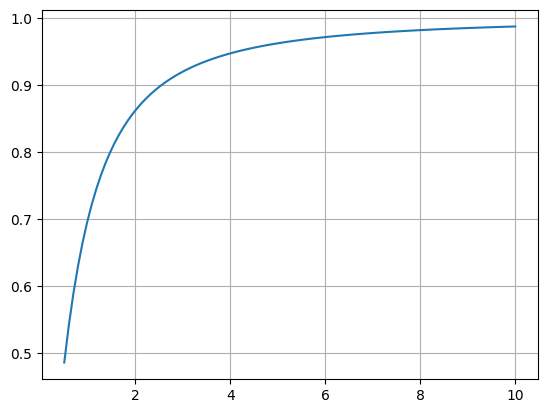

In [8]:
TSR = np.linspace(0.5, 10,  100)
Cp = np.zeros(len(TSR))
for i, tsr in enumerate(TSR):
    rotor = blade_design('s834', tsr, 2, number_of_sections=50, tip_correction_model='', plot = False)
    
    a = rotor['a'].to_numpy() 
    a_line = rotor['a_line'].to_numpy() 
    x = rotor['x'].to_numpy() 
    
    func = interp1d(x, a_line*(1 -a) *x**3, kind='cubic')
    Cp[i] = 8/(tsr**2) * quad(func, x[0], x[-1])[0]
    # Cp[i] = 8/(tsr**2) * np.trapezoid(a_line*(1 - a)*x**3, x)

plt.plot(TSR, 27*Cp/16)
plt.grid()
plt.show()

### Coefficients Extrapolation

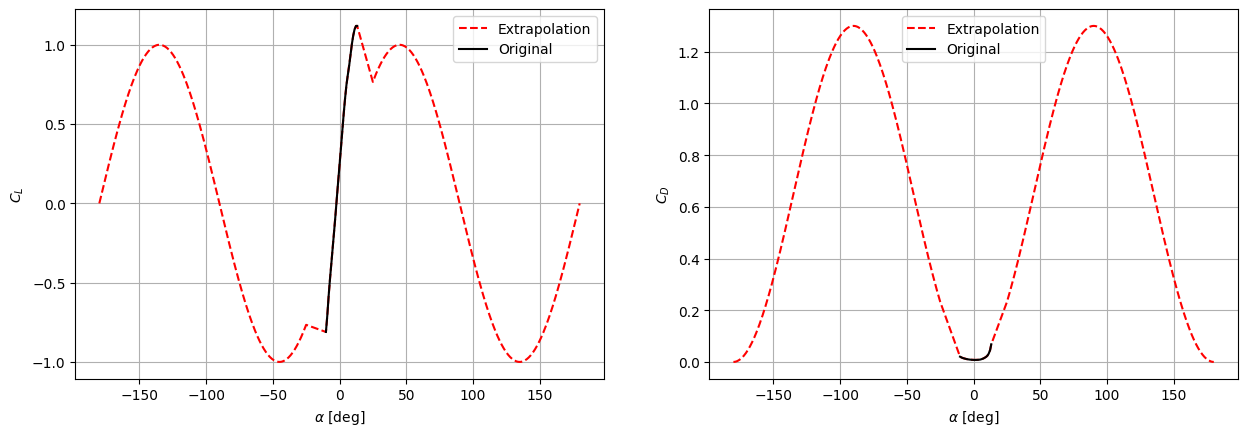

In [7]:
rotor = blade_design('s834', 7, 2, number_of_sections=50,plot=False)
airfoil_name = 's834'
c_lift_drag = process_file(airfoil_path.joinpath(f'{airfoil_name}_c_drg.txt'))
re = max(c_lift_drag, key = lambda x: float(x.split()[-1]))

df_extra = coefficients_extrapolation(c_lift_drag[re][0], rotor)
# alpha = np.deg2rad(np.concatenate((np.linspace(-90, -15, 100), np.linspace(15, 90, 100))))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = [15, 4.8])

ax1.plot(df_extra['alpha'],  df_extra['Cl'], 'r--', label = 'Extrapolation')
ax1.plot(c_lift_drag[re][0][:, 0],  c_lift_drag[re][0][:, 1], 'k',  label = 'Original')

ax1.set_xlabel(r'$\alpha$ [deg]')
ax1.set_ylabel(r'$C_L$')
ax1.legend()
ax1.grid()

ax2.plot(df_extra['alpha'],  df_extra['Cd'], 'r--', label = 'Extrapolation')
ax2.plot(c_lift_drag[re][0][:, 0],  c_lift_drag[re][0][:, 2], 'k', label = 'Original')

ax2.set_xlabel(r'$\alpha$ [deg]')
ax2.set_ylabel(r'$C_D$')
ax2.legend()
ax2.grid()

plt.show()



### Validate BEMT

In [ ]:

# rotor